<h1>2장 NumPy 소개</h1>

<h2>팬시 인덱싱</h2>

<b>팬시 인덱싱 알아보기</b>

In [2]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [6]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [13]:
ind = np.array([[3,7], 
                [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [16]:
X = np.arange(12)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [27]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
row = np.array([0,1,2])
col = np.array([2,1,3])

X[row, col] 

array([ 2,  5, 11])

In [31]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [30]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

<b>결합 인덱싱</b>

In [34]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [36]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [37]:
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [40]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

<b>예제: 임의의 점 선택하기</b>

In [69]:
mean = [0, 0]
cov = [[1,2], 
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

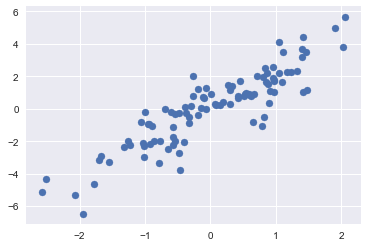

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 플롯 스타일 설정 
plt.scatter(X[:, 0], X[:, 1]);

In [90]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 9, 69, 16, 86, 77, 55,  5, 78,  8, 12, 33, 35, 74, 91, 54, 72, 38,
       25, 59, 56])

In [89]:
selection = X[indices] # 여기에 팬시 인덱싱 사용
selection.shape

(20, 2)

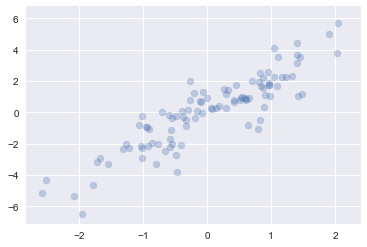

In [88]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);

<b>팬시 인덱싱으로 값 변경하기</b

In [92]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [97]:
x[i] -= 10
print(x)

[ 0 79 79  3 79  5  6  7 79  9]


In [99]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [102]:
i =  [2,3,3,4,4,4]
x[i] += 1
x

array([0., 1., 2., 1., 2., 0., 0., 0., 1., 0.])

In [103]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


<b>예제: 데이터 구간화</b>

In [107]:
np.random.seed(42)
x = np.random.randn(100)
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [114]:
#직접 히스토그램 계산하기 
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [116]:
#각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins, x)
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

In [118]:
#각 구간에 1 더하기
np.add.at(counts, i, 1)

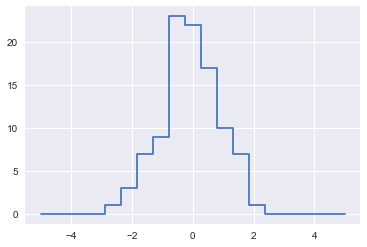

In [122]:
# 결과 플로팅 하기
plt.plot(bins, counts, linestyle='steps');

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

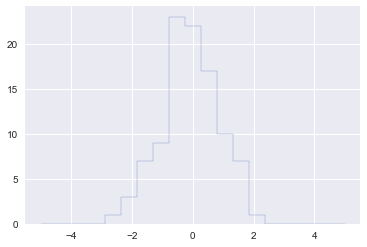

In [123]:
plt.hist(x, bins, histtype='step')

In [129]:
print("Numpy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine:
50.8 µs ± 495 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.2 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [132]:
x = np.random.randn(100000)
print("Numpy rountine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom rountine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy rountine:
5.78 ms ± 71.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom rountine:
12.8 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<b>배열 정렬</b>

In [137]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [138]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [143]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x 

In [144]:
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

<b>NumPy의 빠른 정렬: np.sort와 np.argsort</b>

In [146]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [147]:
x.sort()
print(x)

[1 2 3 4 5]


In [155]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(x)
print(i)

[2 1 4 3 5]
[1 0 3 2 4]


In [156]:
x[i]

array([1, 2, 3, 4, 5])

<b>행이나 열 기준으로 정렬하기</b>

In [160]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [162]:
# X의 각 열을 정렬 
np.sort(X,  axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [163]:
# X의 각 행을 정렬
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

<b>부분 정렬: 파티션 나누기</b> <br> 전체 배열을 정렬할 필요는 없고 단쉰히 배열에서 K개의 가장 작은 값을 찾고 싶을 경우 : np.partition

In [168]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [170]:
np.partition(x, 2)

array([1, 2, 3, 7, 6, 5, 4])

<b>예제: k 최근접 이웃 알고리즘</b>

In [173]:
X = rand.rand(10,2)
X

array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

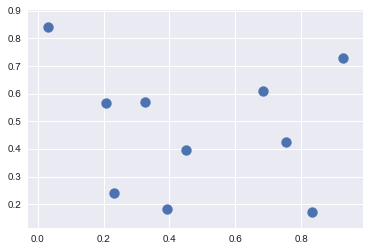

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 플롯팅 스타일
plt.scatter(X[:, 0], X[:, 1], s=100);

In [177]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis = -1)
dist_sq

array([[0.        , 0.34077808, 0.36734458, 0.02910959, 0.30897025,
        0.10724327, 0.40134515, 0.07165428, 0.72052468, 0.11766489],
       [0.34077808, 0.        , 0.21312693, 0.26836165, 0.03936422,
        0.22771985, 0.47899687, 0.10068562, 0.0729948 , 0.12881554],
       [0.36734458, 0.21312693, 0.        , 0.19556145, 0.06945687,
        0.54644225, 1.09046826, 0.19621568, 0.31554885, 0.41437041],
       [0.02910959, 0.26836165, 0.19556145, 0.        , 0.1917251 ,
        0.18211523, 0.5650824 , 0.04877736, 0.58392964, 0.15486817],
       [0.30897025, 0.03936422, 0.06945687, 0.1917251 , 0.        ,
        0.3199873 , 0.6982422 , 0.09429615, 0.12061697, 0.20499577],
       [0.10724327, 0.22771985, 0.54644225, 0.18211523, 0.3199873 ,
        0.        , 0.1065942 , 0.08824681, 0.54201754, 0.01407328],
       [0.40134515, 0.47899687, 1.09046826, 0.5650824 , 0.6982422 ,
        0.1065942 , 0.        , 0.37502203, 0.81487163, 0.16105668],
       [0.07165428, 0.10068562, 0.1962156

In [178]:
# 각 쌍의 점 사이의 좌표 차이를 계산함
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [179]:
# 좌표 차이를 제곱함
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [180]:
# 제곱 거리를 구하기 위해 좌표 차이를 더함
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [181]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [182]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [183]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

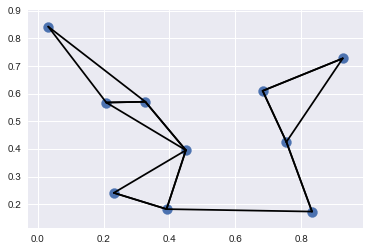

In [189]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# 각 점을 두 개의 가장 가까운 이웃과 선으로 이음
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # X[i]부터 X[j]까지 선으로 이음
        # zip 매직 함수를 이용함
        plt.plot(*zip(X[j], X[i]), color='black')